## Data Analysis

In [1]:
import pandas as pd

data = pd.read_csv('data/train.csv')

data.head()

,id,fact,label
0,id_0,罪犯陈中盛，男，1954年xx月xx日出生，汉族，湖南省永兴县人，文盲，现在河南省新郑监狱服...,12
1,id_1,罪犯王中国，男，1982年xx月xx日生，汉族，吉林省长春市宽城区人，初中毕业，现在吉林省长...,13
2,id_2,罪犯张仁奇，现在宁夏回族自治区银川监狱服刑，以被告人张仁奇犯信用卡诈骗罪，判处有期徒刑刑期六...,8
3,id_3,罪犯吴晨，男，1988年xx月xx日出生，瑶族，广西巴马县人，初中文化，原住广西巴马县巴马镇...,7
4,id_4,罪犯夏宏，女，1980年xx月xx日出生，汉族，初中文化，湖南省邵阳市大祥区人，住湖南省邵阳...,6


### Label distribution

<AxesSubplot: >

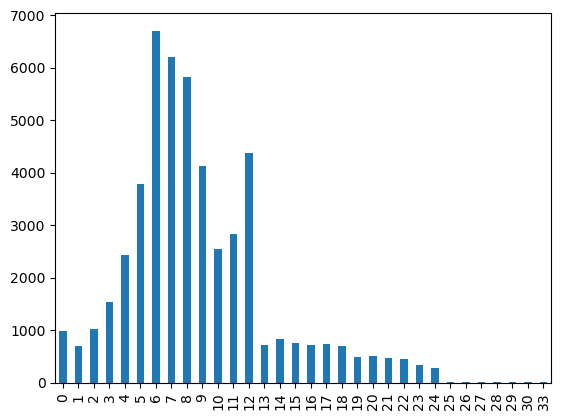

In [2]:
data['label'].value_counts().sort_index().plot(kind="bar")

### Fact text description

Average text length: 593.7158656826864


<AxesSubplot: >

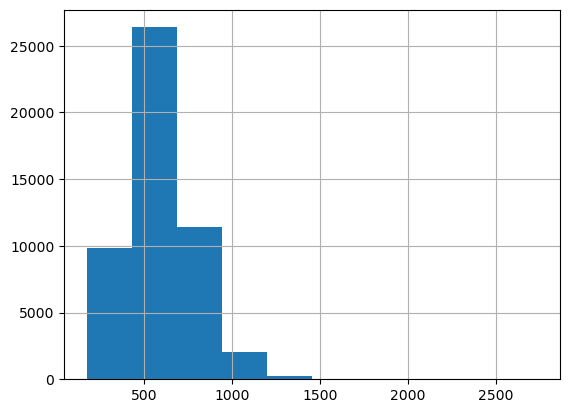

In [3]:
print("Average text length:", data['fact'].str.len().mean())

# pie chart of text length
data['fact'].str.len().hist()

### Text compress

In [4]:
def compress_text(text: str, target_size: int = 510):
    # remove empty spaces
    text = text.replace(' ', '')
    text = text.replace('xx月xx日', '')
    
    if len(text) <= target_size:
        return text

    # split text into sentences
    sentences = text.split('。')

    # always keep the first and last sentence
    kept_sentences = [sentences[0], sentences.pop()]

    # add sentence from the back until the target size is reached
    while len('。'.join(kept_sentences)) <= target_size:
        kept_sentences.insert(1, sentences.pop())

    return '。'.join(kept_sentences)


In [5]:
origin_text = data.fact[0]
print(origin_text, len(origin_text))

罪犯陈中盛，男，1954年xx月xx日出生，汉族，湖南省永兴县人，文盲，现在河南省新郑监狱服刑，认定陈中盛犯盗窃罪，判处有期徒刑十三年，剥夺政治权利二年，并处罚金5万元。刑期自2009年xx月xx日起至2022年xx月xx日止。宣判后，陈中盛等提出上诉。河南省高级人民法院于2011年xx月xx日作出（2011）豫法刑二终字第61号刑事裁定，驳回上诉，维持原判。判决生效后，于2011年xx月xx日交付河南省新郑监狱执行刑罚。该狱以罪犯陈中盛入狱以来确有悔改表现，经过监狱集体评议、公示，检察机关监督等程序提出减刑建议，报送本院。本院立案后依法组成合议庭审理了本案，现已审理终结。 经审理查明，原判认定，2009年xx月xx日，陈中盛伙同他人预谋盗窃长葛市某公司。9月7至xx月xx日，陈中盛等三人在旅店等候接应，其他六人驾车至该公司厂房剪断窗户钢筋，窃取银焊条322.2千克（价值316520元）。陈中盛系主犯。 罪犯陈中盛服刑期间能够认罪服法；认真遵守监规，接受教育改造；积极参加政治、文化、技术学习；积极参加劳动，完成劳动任务。获得记功1次，获得表扬6次。2011年下半年至2014年下半年，半年改造评审鉴定结果依次为一般、良好、一般、良好、良好、良好、良好。河南省新郑监狱经过分监区集体评议、监区长办公会审核后公示、刑罚执行科审查、监狱提请减刑假释评审委员会评审后公示、监狱长办公会决定，并经过驻狱检察室监督评审委员会评审等程序对该犯提出减刑建议。 上述事实有执行机关提供的生效裁判、罪犯改造评审鉴定表、罪犯奖惩审批表、罪犯减刑审核表、检察机关监督评审材料等证据在案佐证。 本院认为，罪犯陈中盛入狱服刑期间确有悔改表现，符合减刑的条件，可予减刑。 727


In [6]:
comp_text = compress_text(data.fact[0])
print(comp_text, len(comp_text))

罪犯陈中盛，男，1954年出生，汉族，湖南省永兴县人，文盲，现在河南省新郑监狱服刑，认定陈中盛犯盗窃罪，判处有期徒刑十三年，剥夺政治权利二年，并处罚金5万元。本院立案后依法组成合议庭审理了本案，现已审理终结。经审理查明，原判认定，2009年，陈中盛伙同他人预谋盗窃长葛市某公司。9月7至，陈中盛等三人在旅店等候接应，其他六人驾车至该公司厂房剪断窗户钢筋，窃取银焊条322.2千克（价值316520元）。陈中盛系主犯。罪犯陈中盛服刑期间能够认罪服法；认真遵守监规，接受教育改造；积极参加政治、文化、技术学习；积极参加劳动，完成劳动任务。获得记功1次，获得表扬6次。2011年下半年至2014年下半年，半年改造评审鉴定结果依次为一般、良好、一般、良好、良好、良好、良好。河南省新郑监狱经过分监区集体评议、监区长办公会审核后公示、刑罚执行科审查、监狱提请减刑假释评审委员会评审后公示、监狱长办公会决定，并经过驻狱检察室监督评审委员会评审等程序对该犯提出减刑建议。上述事实有执行机关提供的生效裁判、罪犯改造评审鉴定表、罪犯奖惩审批表、罪犯减刑审核表、检察机关监督评审材料等证据在案佐证。本院认为，罪犯陈中盛入狱服刑期间确有悔改表现，符合减刑的条件，可予减刑。 525


### Data analysis after compress

<AxesSubplot: >

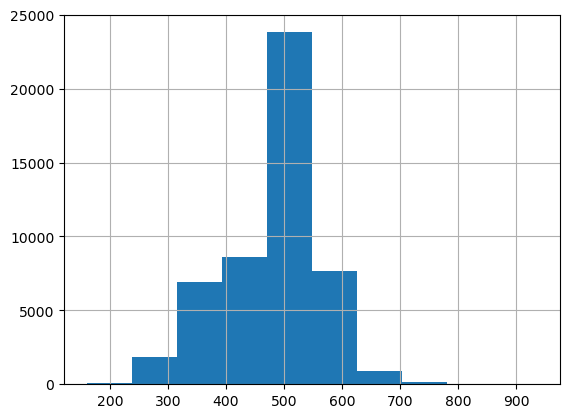

In [7]:
data['compressed_fact'] = [compress_text(t) for t in data['fact'].tolist()]

data['compressed_fact'].str.len().hist()